### Create Polygon using Arcpy Geometry Primitives

In [1]:
import arcpy

In [4]:
# create Polygon
arcpy.management.CreateFeatureclass(
    out_path=r"D:\Andrew_MGIS\GIS5572\PostgreSQL-34-lab0(postgres).sde",
    out_name="poly_FC", 
    spatial_reference="4326"
)

<Result 'D:\\Andrew_MGIS\\GIS5572\\PostgreSQL-34-lab0(postgres).sde\\poly_FC'>

In [5]:
# Polygon Point Information

sr = arcpy.SpatialReference(4326)
feature_info = [[(1, 4), (2, 3), (4, 7), (1, 6), (7, 9)]]
features = []

for feature in feature_info:
    array = arcpy.Array([arcpy.Point(*coords) for coords in feature])
    array.append(array[0])
    
    polygon = arcpy.Polygon(array, sr)
    features.append(polygon)

In [10]:
# Add geometry
with arcpy.da.InsertCursor('lab0.postgres.poly_FC_1', ['SHAPE@']) as cursor:
    cursor.insertRow([polygon])

RuntimeError: The operation is not supported by this implementation.

In [7]:
# Select the Polygon
cursor = arcpy.da.SearchCursor('lab0.postgres.poly_FC_1', 'SHAPE@')
for element in cursor:
    x = element
    break

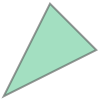

In [8]:
# Visualize the Polygon
geom = x[0]
geom

In [9]:
# Convert the Polygon to WKT
wkt = polygon.WKT
print(wkt)

MULTIPOLYGON (((1.0000000000000568 4.0000000000000568, 2.0000000000000568 3.0000000000000568, 3.5714285710000695 6.1428571430000716, 1.0000000000000568 4.0000000000000568)), ((3.5714285710000695 6.1428571430000716, 7.0000000000000568 9.0000000000000568, 1.0000000000000568 6.0000000000000568, 4.0000000000000568 7.0000000000000568, 3.5714285710000695 6.1428571430000716)))


### Post the Polygon to PostGIS Datbase

In [13]:
arcpy.conversion.ExportFeatures(
    in_features="polygon_fc",
    out_features=r"D:\Andrew_MGIS\GIS5572\PostgreSQL-34-lab0(postgres).sde\lab0.postgres.polygon_fc",
    where_clause="",
    use_field_alias_as_name="NOT_USE_ALIAS",
    field_mapping='Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,polygon_fc,Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,polygon_fc,Shape_Area,-1,-1',
    sort_field=None
)

<Result 'D:\\Andrew_MGIS\\GIS5572\\PostgreSQL-34-lab0(postgres).sde\\lab0.postgres.polygon_fc'>

In [30]:
# connect to db -change to run
conn_params = {
    "host": "34.134.200.167", 
    "database": "lab0",
    "user": "postgres",
    "password": "Flyers7475!7475!", 
    "port": "5432"
}

conn = psycopg2.connect(**conn_params)
cursor = conn.cursor()

NameError: name 'psycopg2' is not defined

In [ ]:
# sql command to create table
create_table_query = """
    CREATE TABLE polygon (
        id SERIAL PRIMARY KEY,
        geom GEOMETRY(MULTIPOLYGON, 4326)
    );
"""

# Execute query
cursor.execute(create_table_query)
conn.commit()
print("Table 'polygon' created successfully.")

In [ ]:
# insert the polygon 
insert_query = """
    INSERT INTO polygon (geom)
    VALUES (ST_GeomFromText(%s, 4326));
"""
cursor.execute(insert_query, (wkt,))
conn.commit()

# verify insertion
cursor.execute("SELECT id, ST_AsText(geom) FROM polygon;")
rows = cursor.fetchall()
for row in rows:
    print(f"ID: {row[0]}, Geometry: {row[1]}")

# close the connection
cursor.close()
conn.close()